# Imports

In [1]:
import os
import numpy as np
import pandas as pd
from pandas import*
import librosa
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
import json
from sklearn import*
import matplotlib.pyplot as plt
from sklearn.metrics import *
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.callbacks import CSVLogger
from keras.callbacks import EarlyStopping

# Reading the dataset and classifying as real and fake

In [2]:
# Define paths and parameters
NUM_CLASSES = 2  # Number of classes (bonafide and spoof)
SAMPLE_RATE = 44100  # Sample rate of your audio files
DURATION = 5  # Duration of audio clips in seconds
N_MELS = 128  # Number of Mel frequency bins

In [3]:
cd D:\Users\Leal\Desktop\MSc ASA\Semester 3\Data Driven Analytics - 3

D:\Users\Leal\Desktop\MSc ASA\Semester 3\Data Driven Analytics - 3


In [4]:
data=pd.read_csv('Audio Data.csv')

In [5]:
data

,Unnamed: 0,file,melspectrogram,label
0,0,file1000.wav_16k.wav_norm.wav_mono.wav_silence...,"[[-15.024648666381836, -9.630731582641602, -7....",1.0
1,1,file10003.wav_16k.wav_norm.wav_mono.wav_silenc...,"[[-21.11977767944336, -23.317171096801758, -6....",1.0
2,2,file10006.wav_16k.wav_norm.wav_mono.wav_silenc...,"[[-40.6443977355957, -40.774723052978516, -32....",1.0
3,3,file10009.wav_16k.wav_norm.wav_mono.wav_silenc...,"[[-24.780620574951172, -24.126808166503906, -3...",1.0
4,4,file10010.wav_16k.wav_norm.wav_mono.wav_silenc...,"[[-19.424327850341797, -15.416473388671875, -1...",1.0
...,...,...,...,...
17865,2821,file9893.mp3.wav_16k.wav_norm.wav_mono.wav_sil...,"[[-28.31854248046875, -12.01828384399414, -3.1...",0.0
17866,2822,file9913.mp3.wav_16k.wav_norm.wav_mono.wav_sil...,"[[-25.881887435913086, -19.857664108276367, -5...",0.0
17867,2823,file9914.mp3.wav_16k.wav_norm.wav_mono.wav_sil...,"[[-16.290851593017578, -15.090450286865234, -1...",0.0
17868,2824,file9919.mp3.wav_16k.wav_norm.wav_mono.wav_sil...,"[[-28.000652313232422, -33.31414794921875, -17...",0.0


In [6]:
real_dataframe=data[data['label']==1]

In [7]:
real_dataframe=real_dataframe.reset_index()

In [8]:
real_dataframe

,index,Unnamed: 0,file,melspectrogram,label
0,0,0,file1000.wav_16k.wav_norm.wav_mono.wav_silence...,"[[-15.024648666381836, -9.630731582641602, -7....",1.0
1,1,1,file10003.wav_16k.wav_norm.wav_mono.wav_silenc...,"[[-21.11977767944336, -23.317171096801758, -6....",1.0
2,2,2,file10006.wav_16k.wav_norm.wav_mono.wav_silenc...,"[[-40.6443977355957, -40.774723052978516, -32....",1.0
3,3,3,file10009.wav_16k.wav_norm.wav_mono.wav_silenc...,"[[-24.780620574951172, -24.126808166503906, -3...",1.0
4,4,4,file10010.wav_16k.wav_norm.wav_mono.wav_silenc...,"[[-19.424327850341797, -15.416473388671875, -1...",1.0
...,...,...,...,...,...
8930,16452,1408,file9940.wav_16k.wav_norm.wav_mono.wav_silence...,"[[-17.057231903076172, -5.793543338775635, -9....",1.0
8931,16453,1409,file9945.wav_16k.wav_norm.wav_mono.wav_silence...,"[[-20.95789337158203, -23.10790252685547, -15....",1.0
8932,16454,1410,file9969.wav_16k.wav_norm.wav_mono.wav_silence...,"[[-25.85365867614746, -26.072376251220703, -35...",1.0
8933,16455,1411,file9974.wav_16k.wav_norm.wav_mono.wav_silence...,"[[-22.15683937072754, -8.394891738891602, -10....",1.0


In [9]:
fake_dataframe=data[data['label']==0]

In [10]:
fake_dataframe=fake_dataframe.reset_index()

In [11]:
fake_dataframe

,index,Unnamed: 0,file,melspectrogram,label
0,6978,6978,file10005.mp3.wav_16k.wav_norm.wav_mono.wav_si...,"[[-38.33302307128906, -32.66326141357422, -5.1...",0.0
1,6979,6979,file10007.mp3.wav_16k.wav_norm.wav_mono.wav_si...,"[[-21.484039306640625, -12.57840347290039, -2....",0.0
2,6980,6980,file10009.mp3.wav_16k.wav_norm.wav_mono.wav_si...,"[[-18.21822166442871, -13.968538284301758, -20...",0.0
3,6981,6981,file10010.mp3.wav_16k.wav_norm.wav_mono.wav_si...,"[[-15.390536308288574, -13.715254783630371, -1...",0.0
4,6982,6982,file10015.mp3.wav_16k.wav_norm.wav_mono.wav_si...,"[[-37.87236022949219, -13.042974472045898, -24...",0.0
...,...,...,...,...,...
8930,17865,2821,file9893.mp3.wav_16k.wav_norm.wav_mono.wav_sil...,"[[-28.31854248046875, -12.01828384399414, -3.1...",0.0
8931,17866,2822,file9913.mp3.wav_16k.wav_norm.wav_mono.wav_sil...,"[[-25.881887435913086, -19.857664108276367, -5...",0.0
8932,17867,2823,file9914.mp3.wav_16k.wav_norm.wav_mono.wav_sil...,"[[-16.290851593017578, -15.090450286865234, -1...",0.0
8933,17868,2824,file9919.mp3.wav_16k.wav_norm.wav_mono.wav_sil...,"[[-28.000652313232422, -33.31414794921875, -17...",0.0


# Splitting the dataset into train and test

In [12]:
# Example data where 'fake_data' and 'real_data' are your data points
fake_data = fake_dataframe
real_data = real_dataframe

In [13]:
# Shuffling the rows of the datasets
real_data=real_data.sample(frac=1, random_state=42)
fake_data=fake_data.sample(frac=1, random_state=42)

In [14]:
#Finding the 70% and 30% values in the datasets
n_total_fake = len(fake_data)
n_total_real = len(real_data)
n_train_fake = round((n_total_fake)*0.7)
n_test_fake = n_total_fake - n_train_fake
n_train_real = round((n_total_real) * 0.7)
n_test_real = n_total_real - n_train_real
print("Total rows in fake data: ",n_total_fake)
print("Total rows in fake training data: ",n_train_fake)
print("Total rows in fake testing data: ",n_test_fake)
print("Total rows in real data: ",n_total_real)
print("Total rows in real training data: ",n_train_real)
print("Total rows in real testing data: ",n_test_real)

Total rows in fake data:  8935
Total rows in fake training data:  6254
Total rows in fake testing data:  2681
Total rows in real data:  8935
Total rows in real training data:  6254
Total rows in real testing data:  2681


In [15]:
# Slicing the dataframes for the training and test sets
fake_train = fake_data.iloc[:n_train_fake]
fake_test = fake_data.iloc[n_train_fake:]
real_train = real_data.iloc[:n_train_real]
real_test = real_data.iloc[n_train_real:]
print(fake_train.shape)
print(fake_test.shape)
print(real_train.shape)
print(real_test.shape)


(6254, 5)
(2681, 5)
(6254, 5)
(2681, 5)


In [16]:
#Concatenating both the real and fake to make the training and test dataframes
traindataframe = pd.concat([fake_train, real_train], ignore_index=True)
testdataframe = pd.concat([fake_test, real_test], ignore_index=True)

In [17]:
print("Shape of training dataframe",traindataframe.shape)
print("Shape of real values in training dataframe",traindataframe[traindataframe['label']==1].shape)
print("Shape of fake values in training dataframe",traindataframe[traindataframe['label']==0].shape)

print("Shape of test dataframe",testdataframe.shape)
print("Shape of real values in test dataframe",testdataframe[testdataframe['label']==1].shape)
print("Shape of fake values in test dataframe",testdataframe[testdataframe['label']==0].shape)
#17870 is the total rows

Shape of training dataframe (12508, 5)
Shape of real values in training dataframe (6254, 5)
Shape of fake values in training dataframe (6254, 5)
Shape of test dataframe (5362, 5)
Shape of real values in test dataframe (2681, 5)
Shape of fake values in test dataframe (2681, 5)


# Converting melspectrogram values into arrays in both train and test 

In [18]:
l=[]
for i in range(0,len(traindataframe)):
    a=traindataframe['melspectrogram'][i]
    res=json.loads(a)
    l.append(res)
X_train = np.array(l)

In [19]:
Y=traindataframe['label']
intY = [int(num) for num in Y]
y_train=np.array(intY)
y_train_encoded = to_categorical(y_train, NUM_CLASSES)

In [20]:
print("Shape of the training melspectrogram array: ",X_train.shape)
print("Shape of the training label array: ",y_train_encoded.shape)

Shape of the training melspectrogram array:  (12508, 10, 109)
Shape of the training label array:  (12508, 2)


In [21]:
l=[]
for i in range(0,len(testdataframe)):
    a=testdataframe['melspectrogram'][i]
    res=json.loads(a)
    l.append(res)
X_test = np.array(l)

In [22]:
Y=testdataframe['label']
intY = [int(num) for num in Y]
y_test=np.array(intY)
y_test_encoded = to_categorical(y_test, NUM_CLASSES)

In [23]:
print("Shape of the testing melspectrogram array: ",X_test.shape)
print("Shape of the testing label array: ",y_test_encoded.shape)

Shape of the testing melspectrogram array:  (5362, 10, 109)
Shape of the testing label array:  (5362, 2)


# Defining the model architecture

In [24]:
# Define CNN model architecture
input_shape = (10, 109,1)  # Input shape for CNN (height, width, channels)
model_input = Input(shape=input_shape)

In [25]:
# 1D CNN model
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Convolutional layers
model.add(layers.Conv1D(32, kernel_size=3, activation='relu', input_shape=(10, 109)))
#model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Conv1D(64, kernel_size=3, activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))

# Flatten the output for the fully connected layers
model.add(layers.Flatten())

# Fully connected layers
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout layer for regularization
model.add(layers.Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print a summary of the model architecture
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 8, 32)             10496     
                                                                 
 conv1d_1 (Conv1D)           (None, 6, 64)             6208      
                                                                 
 max_pooling1d (MaxPooling1  (None, 3, 64)             0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 192)               0         
                                                                 
 dense (Dense)               (None, 128)               24704     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                        

Epoch 1/30
196/196 [==============================] - 3s 6ms/step - loss: 1.4909 - accuracy: 0.5461
Epoch 2/30
196/196 [==============================] - 1s 7ms/step - loss: 0.6793 - accuracy: 0.5756
Epoch 3/30
196/196 [==============================] - 1s 7ms/step - loss: 0.6763 - accuracy: 0.5782
Epoch 4/30
196/196 [==============================] - 2s 8ms/step - loss: 0.6689 - accuracy: 0.5947
Epoch 5/30
196/196 [==============================] - 1s 6ms/step - loss: 0.6627 - accuracy: 0.6054
Epoch 6/30
196/196 [==============================] - 1s 6ms/step - loss: 0.6533 - accuracy: 0.6204
Epoch 7/30
196/196 [==============================] - 1s 6ms/step - loss: 0.6470 - accuracy: 0.6306
Epoch 8/30
196/196 [==============================] - 1s 7ms/step - loss: 0.6521 - accuracy: 0.6174
Epoch 9/30
196/196 [==============================] - 1s 6ms/step - loss: 0.6383 - accuracy: 0.6360
Epoch 10/30
196/196 [==============================] - 2s 8ms/step - loss: 0.6274 - accuracy: 0.6509

Text(0.5, 1.0, 'Plot of Accuracy vs. Epochs')

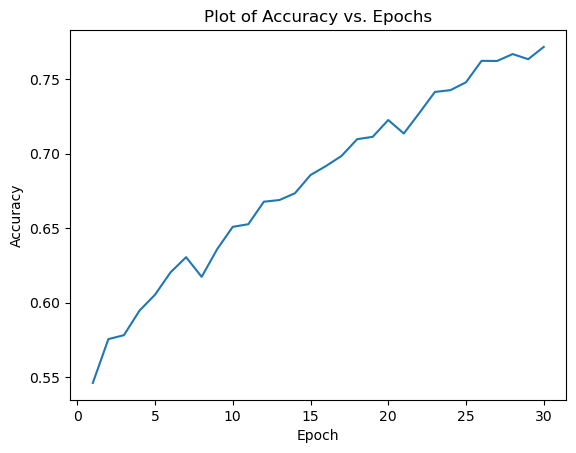

In [26]:
# training the 1D CNN model
m=model.fit(X_train, y_train_encoded, epochs=30, batch_size=64)
acr=m.history['accuracy']
num=range(1,len(acr)+1)
plt.plot(num,acr)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Plot of Accuracy vs. Epochs')

In [27]:
m

In [28]:
# Predict using the loaded model
y_pred = model.predict(X_test)

168/168 [==============================] - 1s 5ms/step


In [29]:
# Convert probabilities to predicted classes
y_pred_classes = np.argmax(y_pred, axis=1)

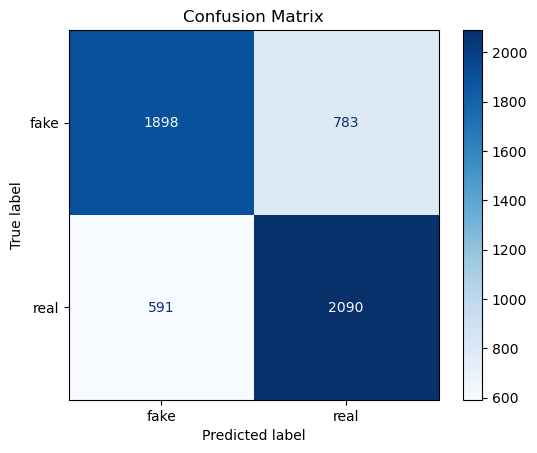

In [37]:
# CONFUSION MATRIX

cm = confusion_matrix(y_test, y_pred_classes)

# Display the confusion matrix
classes = ["fake", "real"]
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [31]:
accuracy_score(y_test, y_pred_classes)

0.7437523312196942

168/168 [==============================] - 1s 5ms/step


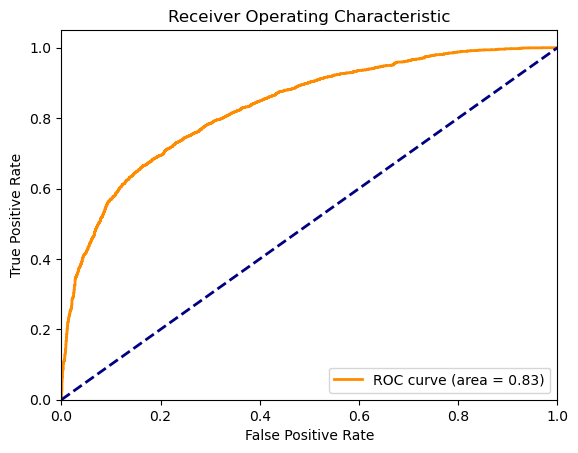

In [32]:
# ROC Curve

from sklearn.metrics import roc_curve, auc

# Predict using the loaded model
y_pred = model.predict(X_test)

# Get the predicted probabilities for the positive class
y_pred_prob = y_pred[:, 1]

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [33]:
# Precision-Recall Curve
from sklearn.metrics import precision_recall_curve, average_precision_score

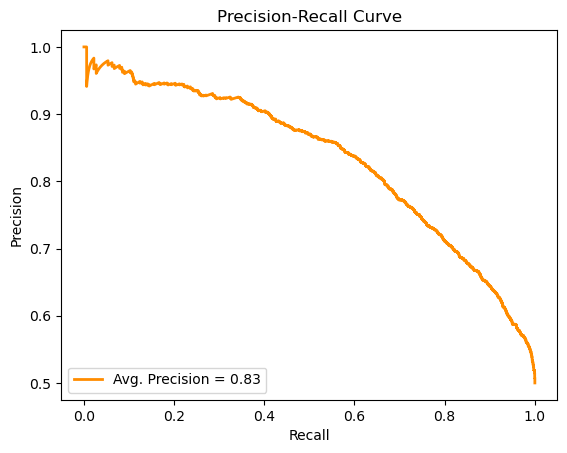

In [34]:
# Compute precision-recall curve and average precision score
precision, recall, _ = precision_recall_curve(y_test, y_pred_prob)
avg_precision = average_precision_score(y_test, y_pred_prob)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, color='darkorange', lw=2, label='Avg. Precision = %0.2f' % avg_precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [35]:
# Calibration Curve
from sklearn.calibration import calibration_curve

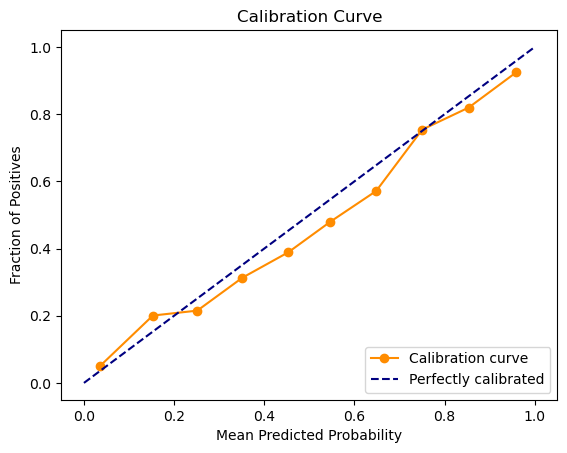

In [36]:
# Compute calibration curve
prob_true, prob_pred = calibration_curve(y_test, y_pred_prob, n_bins=10)

# Plot calibration curve
plt.figure()
plt.plot(prob_pred, prob_true, marker='o', label='Calibration curve', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='navy', label='Perfectly calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend(loc="lower right")
plt.show()